<a href="https://colab.research.google.com/github/Neuron-Automation/for-git-study/blob/master/PREVISIONES_DE_PRECIOS_DE_LA_VIVIENDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NEURON AUTOMATION , TASK SOLVED

Saving train.csv to train.csv
Shape del dataset: (1460, 81)
Modelo: Regresión Lineal
   MSE: 2314465092.73
----------------------------------------
Modelo: SVM
   MSE: 6028358470.66
----------------------------------------
Modelo: Árbol de Decisión
   MSE: 2367486599.23
----------------------------------------
Modelo: Bosque Aleatorio
   MSE: 1638291753.97
----------------------------------------

📊 Comparación de Modelos (MSE más bajo = mejor):
              Modelo           MSE
3   Bosque Aleatorio  1.638292e+09
0   Regresión Lineal  2.314465e+09
2  Árbol de Decisión  2.367487e+09
1                SVM  6.028358e+09


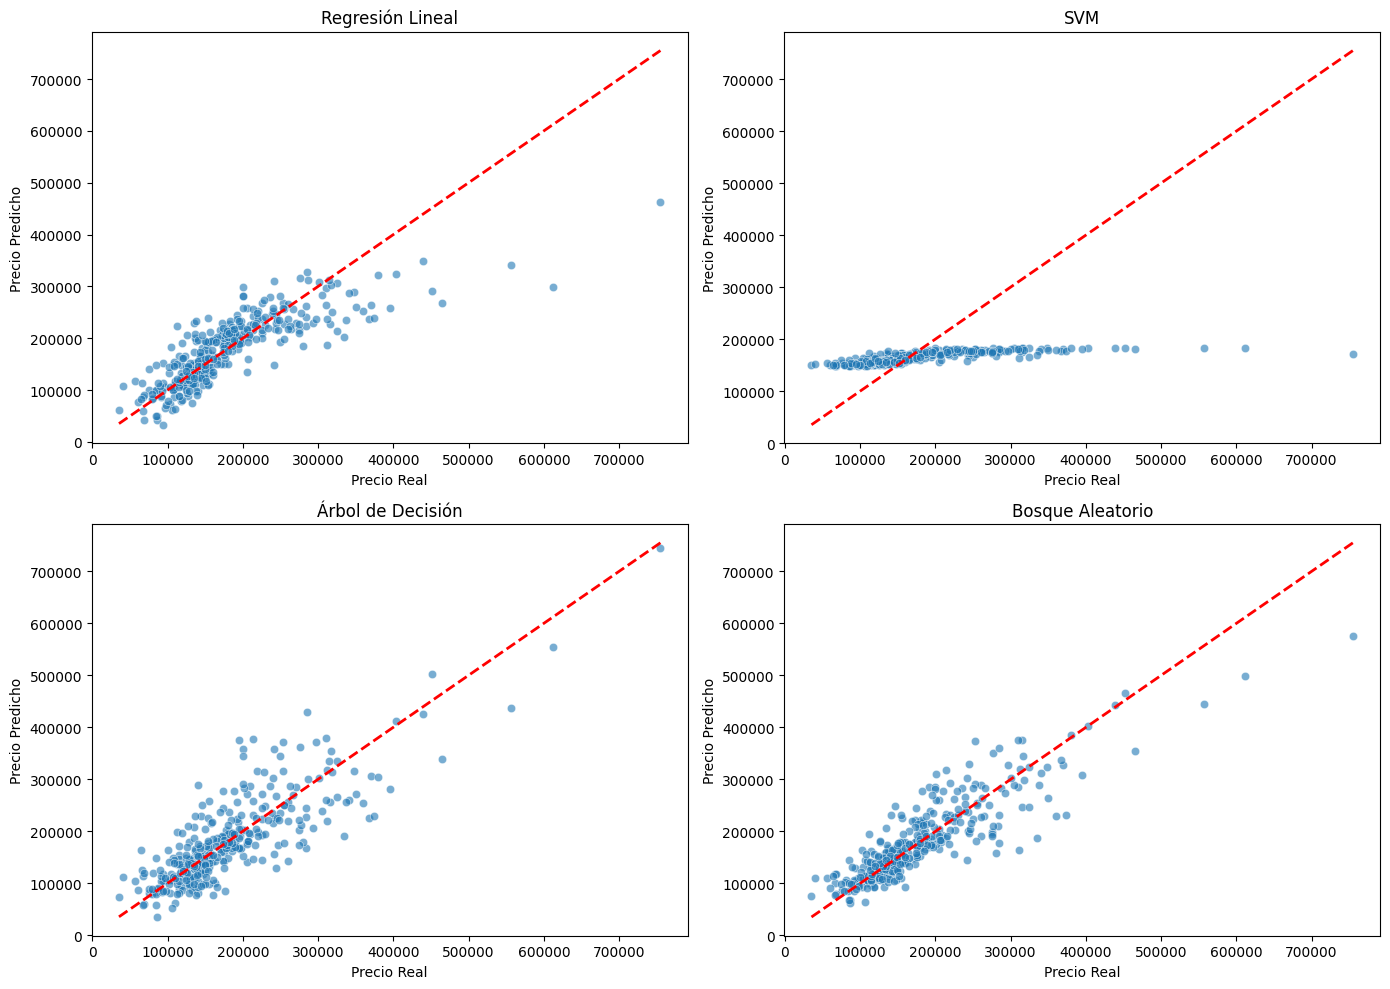

In [1]:



# 1. Librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# 2. Cargar dataset (subir train.csv desde Kaggle)

from google.colab import files
uploaded = files.upload()  # Subir train.csv

# Cargar el archivo
df = pd.read_csv("train.csv")
print("Shape del dataset:", df.shape)
df.head()

# 3. Selección de características y target

X = df[["GrLivArea", "YearBuilt"]]   # Variables explicativas
y = df["SalePrice"]                  # Variable objetivo

# División train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Escalado (solo para modelos sensibles como SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 4. Entrenamiento y evaluación de modelos


# Diccionario de modelos
modelos = {
    "Regresión Lineal": LinearRegression(),
    "SVM": SVR(kernel="rbf", C=100, gamma=0.1),
    "Árbol de Decisión": DecisionTreeRegressor(random_state=42),
    "Bosque Aleatorio": RandomForestRegressor(random_state=42, n_estimators=100)
}

resultados = {}

for nombre, modelo in modelos.items():
    if nombre == "SVM":
        modelo.fit(X_train_scaled, y_train)
        y_pred = modelo.predict(X_test_scaled)
    else:
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    resultados[nombre] = mse

    print(f"Modelo: {nombre}")
    print(f"   MSE: {mse:.2f}")
    print("-"*40)


# 5. Tabla comparativa de resultados

resultados_df = pd.DataFrame(list(resultados.items()), columns=["Modelo", "MSE"]).sort_values(by="MSE")
print("\n📊 Comparación de Modelos (MSE más bajo = mejor):")
print(resultados_df)


# 6. Visualización: Valores Reales vs Predicciones

fig, axes = plt.subplots(2, 2, figsize=(14,10))
axes = axes.flatten()

for i, (nombre, modelo) in enumerate(modelos.items()):
    if nombre == "SVM":
        y_pred = modelo.predict(X_test_scaled)
    else:
        y_pred = modelo.predict(X_test)

    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, ax=axes[i])
    axes[i].plot([y_test.min(), y_test.max()],
                 [y_test.min(), y_test.max()],
                 "r--", lw=2)
    axes[i].set_title(nombre)
    axes[i].set_xlabel("Precio Real")
    axes[i].set_ylabel("Precio Predicho")

plt.tight_layout()
plt.show()
